In [2]:
# importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the data directly from github & checking the top 5 entries
data = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [5]:
data.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [6]:
data.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

### encoding the sex column into 0 & 1 

In [7]:
# import the necessary class from sklearn
from sklearn.preprocessing import LabelEncoder

In [8]:
# doing fit_transform on original sex column and making a new column to dataset.
sex_new = LabelEncoder()
data['sex_enc'] = sex_new.fit_transform(data['Sex'])

In [10]:
# getting only inputs/features from data and saving in a new dataframe
inputs = data.drop(columns=['Survived','PassengerId','Name','Sex','Ticket','Cabin','Embarked'])

In [11]:
# defining the targets from data
targets = data.Survived

In [12]:
# checking the total information of inputs
inputs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pclass   891 non-null    int64  
 1   Age      714 non-null    float64
 2   SibSp    891 non-null    int64  
 3   Parch    891 non-null    int64  
 4   Fare     891 non-null    float64
 5   sex_enc  891 non-null    int32  
dtypes: float64(2), int32(1), int64(3)
memory usage: 38.4 KB


In [13]:
# Age column is having some NaN/null values, so that needs to be addressed.
inputs.Age.isna().sum()

177

In [14]:
# getting the median Age
age_median = inputs.Age.median()
age_median

28.0

In [15]:
# filling the Null values in Age by median of age
inputs.Age.fillna(age_median,inplace=True)

In [16]:
# ensuring no null values for Age
inputs.Age.isna().sum()

0

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(inputs,targets,train_size=0.8)

In [19]:
x_train

,Pclass,Age,SibSp,Parch,Fare,sex_enc
199,2,24.0,0,0,13.0000,0
860,3,41.0,2,0,14.1083,1
507,1,28.0,0,0,26.5500,1
479,3,2.0,0,1,12.2875,0
382,3,32.0,0,0,7.9250,1
...,...,...,...,...,...,...
67,3,19.0,0,0,8.1583,1
716,1,38.0,0,0,227.5250,0
544,1,50.0,1,0,106.4250,1
307,1,17.0,1,0,108.9000,0


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model = DecisionTreeClassifier()

In [22]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
model.score(x_test,y_test)

0.776536312849162

In [24]:
y_test.shape

(179,)

In [25]:
179-(91+46)

42

In [26]:
y_predicted = model.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[94, 19],
       [21, 45]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

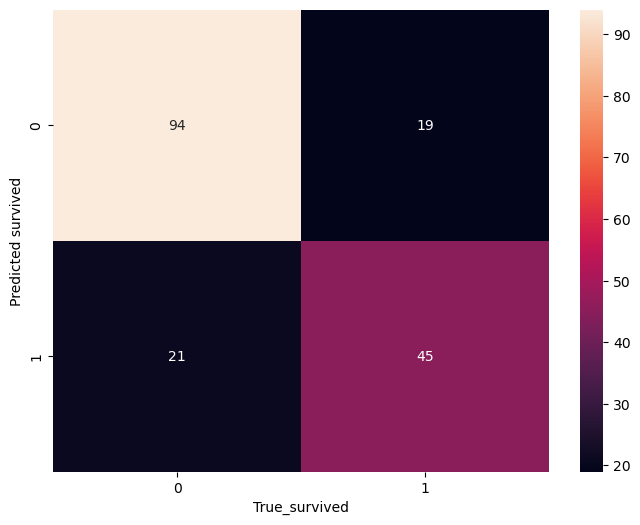

In [29]:
plt.figure(figsize = (8,6))
sns.heatmap(cm,annot=True,cmap='rocket')
plt.xlabel("True_survived")
plt.ylabel("Predicted survived")
plt.show